## Unsupervised Learning

Data from Otto Product Classification Challenge <br>
https://www.kaggle.com/c/otto-group-product-classification-challenge/data <br> <br> 
**Dataset Description:** Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further. [...] The products for the training and testing sets are selected randomly.

We know that there are 9 product categories, but we'll neglect this information to simulate an unsupervised learning problem.

### Data Fetching

In [197]:
import pandas as pd

df = pd.read_csv('data/train.csv')
print(df.shape)
df.head()

(61878, 95)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [198]:
#Keep y (targets) for evaluation of clustering 
y = df.iloc[:,-1:].target
print(y.shape)
X = df.iloc[:,:-1].drop(['id'], axis=1)
print(X.shape)
X.head(1)

(61878,)
(61878, 93)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [199]:
y.value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

<br> 
### Data Exploration

In [183]:
X[X.isnull().any(axis=1)]

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93


No NaN, that's nice.

In [184]:
for col in X.columns: 
    vc = X[col].value_counts()
    print(col, "(min/max):", vc.index.min(), vc.index.max(), 
          ' -- max = {} with count {}'.format(vc.index[0], vc.iloc[0]))

feat_1 (min/max): 0 61  -- max = 0 with count 51483
feat_2 (min/max): 0 51  -- max = 0 with count 55018
feat_3 (min/max): 0 64  -- max = 0 with count 49295
feat_4 (min/max): 0 70  -- max = 0 with count 48448
feat_5 (min/max): 0 19  -- max = 0 with count 58907
feat_6 (min/max): 0 10  -- max = 0 with count 60710
feat_7 (min/max): 0 38  -- max = 0 with count 56443
feat_8 (min/max): 0 76  -- max = 0 with count 45312
feat_9 (min/max): 0 43  -- max = 0 with count 49836
feat_10 (min/max): 0 30  -- max = 0 with count 54195
feat_11 (min/max): 0 38  -- max = 0 with count 45043
feat_12 (min/max): 0 30  -- max = 0 with count 55342
feat_13 (min/max): 0 72  -- max = 0 with count 50430
feat_14 (min/max): 0 33  -- max = 0 with count 34542
feat_15 (min/max): 0 46  -- max = 0 with count 43770
feat_16 (min/max): 0 37  -- max = 0 with count 31649
feat_17 (min/max): 0 43  -- max = 0 with count 51748
feat_18 (min/max): 0 32  -- max = 0 with count 44037
feat_19 (min/max): 0 121  -- max = 0 with count 56122
f

All event columns numerical, no boolean events.

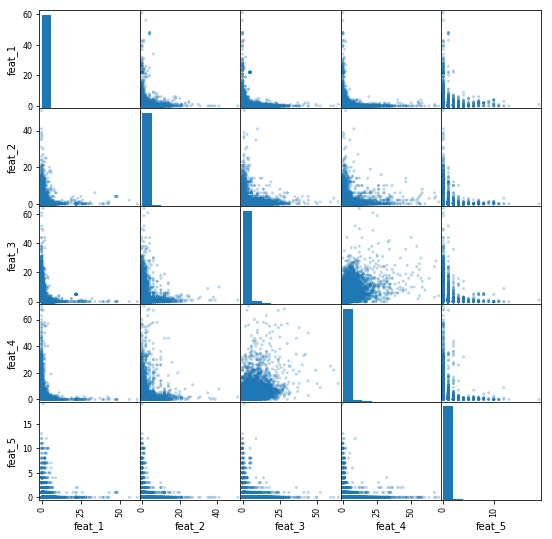

In [6]:
from pandas.plotting import scatter_matrix

plot_1_4 = scatter_matrix(X.iloc[:,:5], alpha=0.3, figsize=(9,9))

Feat_3 & Feat_4 e.g. show a different, more collinear distribution than the other relationships.

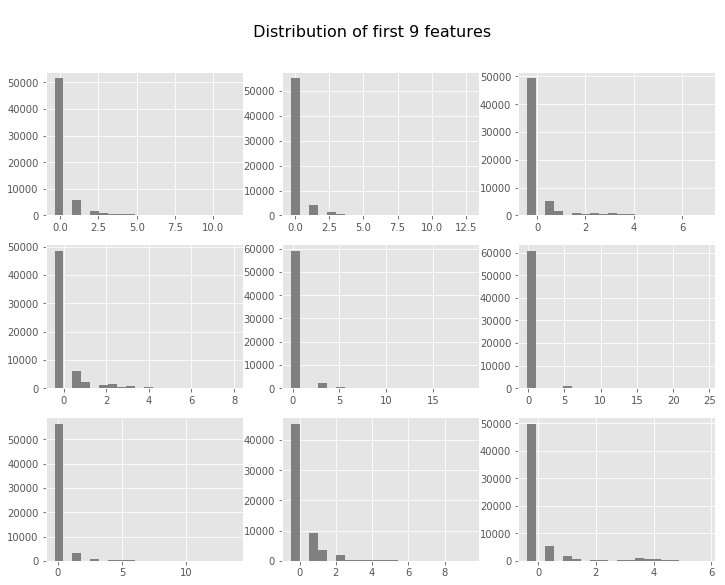

In [154]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

#Distribution of first 9 dimensions
f = plt.figure(figsize=(12,9))
f.suptitle('\n Distribution of first 9 features', fontsize=16)
for i,feat in enumerate(X_scaled.columns[:9]): 
    ax = f.add_subplot(330+(i+1))
    ax.hist(X_scaled[feat].values, bins=20, color='grey')

<br> 
### Log-Transform & Scale

Clear Exp. of strongly skewed feature distributions. We'll add 1, log-transform and scale afterwards. 

In [200]:
X = X + 1
X.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,2,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2,1,1,2,7,2,6,1,1,2,...,23,1,2,3,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,2,1,1,1


In [201]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p, validate=True)
X_log = pd.DataFrame(log_transformer.transform(X), columns=range(1,94))
X_log.head()

,1,2,3,4,5,6,7,8,9,10,...,84,85,86,87,88,89,90,91,92,93
0,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,...,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
1,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,...,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
2,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,...,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
3,1.098612,0.693147,0.693147,1.098612,2.079442,1.098612,1.945910,0.693147,0.693147,1.098612,...,3.178054,0.693147,1.098612,1.386294,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
4,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,...,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147


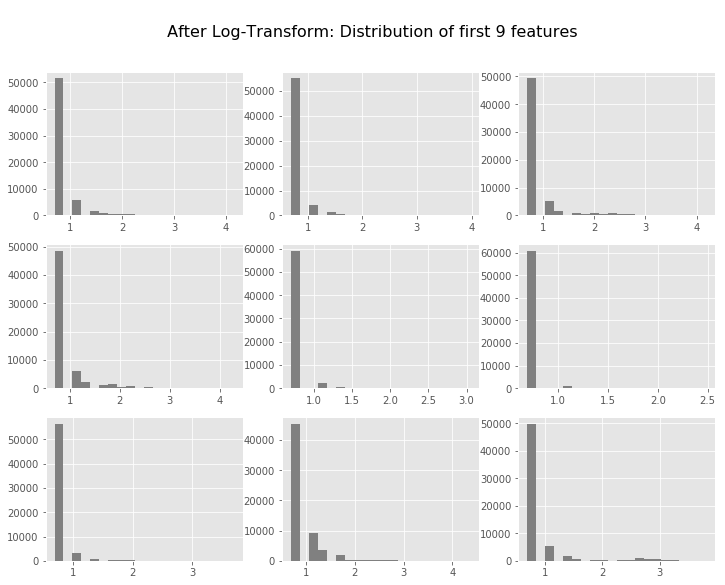

In [187]:
#Distribution of first 9 dimensions
f = plt.figure(figsize=(12,9))
f.suptitle('\n After Log-Transform: Distribution of first 9 features', fontsize=16)
for i,feat in enumerate(X_log.columns[:9]): 
    ax = f.add_subplot(330+(i+1))
    ax.hist(X_log[feat].values, bins=20, color='grey')

In [202]:
#Scale X
from sklearn.preprocessing import StandardScaler

X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_log))
print(len(X_scaled.iloc[0]))
X_scaled.head(2)

93


,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.999335,-0.294643,-0.407091,-0.42486,-0.200061,-0.129807,-0.261394,-0.484996,-0.381183,-0.320835,...,-0.11814,0.759440,-0.655659,-0.406819,-0.559067,-0.446361,-0.300094,-0.221989,-0.465934,-0.209284
1,-0.378035,-0.294643,-0.407091,-0.42486,-0.200061,-0.129807,-0.261394,0.608691,-0.381183,-0.320835,...,-0.11814,-0.419639,-0.655659,-0.406819,-0.559067,-0.446361,-0.300094,-0.221989,-0.465934,-0.209284


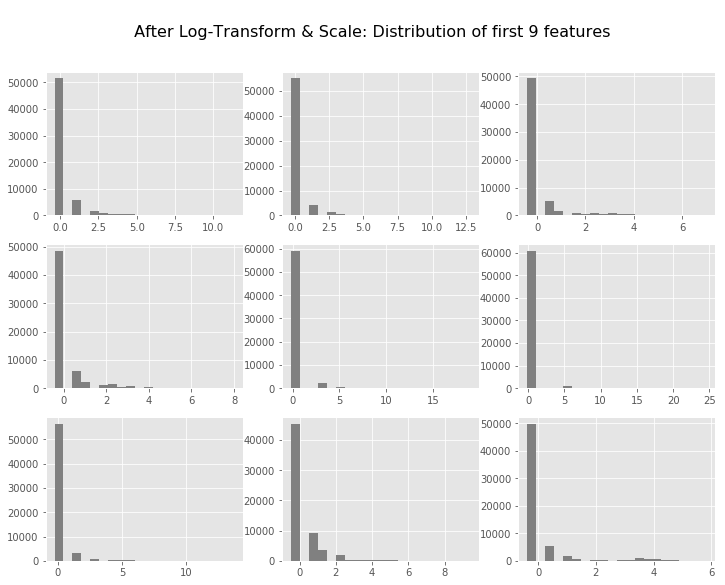

In [189]:
#Distribution of first 9 dimensions
f = plt.figure(figsize=(12,9))
f.suptitle('\n After Log-Transform & Scale: Distribution of first 9 features', fontsize=16)
for i,feat in enumerate(X_scaled.columns[:9]): 
    ax = f.add_subplot(330+(i+1))
    ax.hist(X_scaled[feat].values, bins=20, color='grey')

<br> 
### A case for dimensionality reduction?

** Why reducing dimensions?** 

"There are issues associated with high-dimensional data (albeit most people would consider 30 to be just "medium" dimensionality). The most obvious one is that the notion of distance itself is often rather meaningless. Say, your first variable is "shoe size", the second is "age". How can you expect an euclidean distance function to perform a meaningful distance computation?"

See amongst others: <br>
https://en.wikipedia.org/wiki/Clustering_high-dimensional_data <br>
https://stats.stackexchange.com/questions/23059/what-is-maximum-number-of-variables-that-we-can-use-to-run-a-cluster-analysis

#### PCA

In [203]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
X_pca.head(2)

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.279231,0.420509,0.284235,3.492857,-1.533999,0.829677,-1.843292,1.041882,-0.096451,-0.607013,...,-0.451410,-0.627843,-0.076531,-0.110536,-0.895359,-0.000822,-0.025585,-0.090482,0.643841,-0.144814
1,-1.855384,0.034045,-2.244355,0.153165,-0.525561,-0.090585,0.721702,-0.180801,-0.275821,-0.451965,...,-0.410107,0.246605,0.016502,-0.108373,-0.164601,-0.056354,-0.321759,0.146493,-0.271662,0.308508


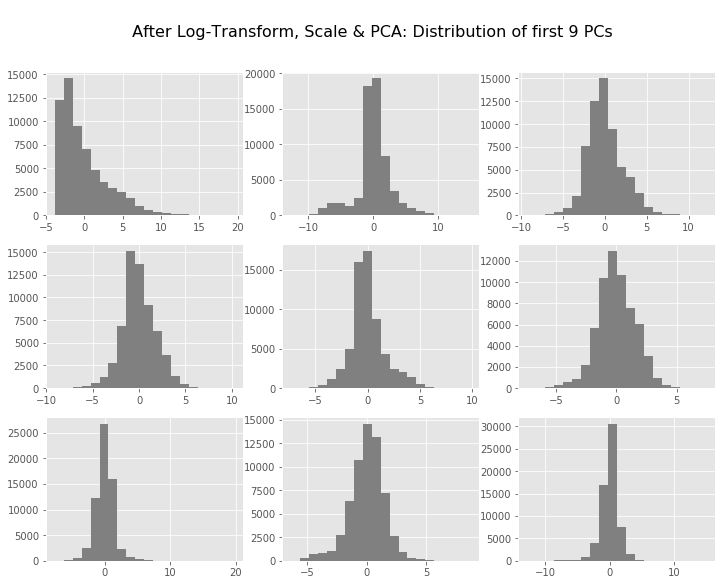

In [157]:
#Distribution of first 9 dimensions
f = plt.figure(figsize=(12,9))
f.suptitle('\n After Log-Transform, Scale & PCA: Distribution of first 9 PCs', fontsize=16)
for i,feat in enumerate(X_pca.columns[:9]): 
    ax = f.add_subplot(330+(i+1))
    ax.hist(X_pca[feat].values, bins=20, color='grey')

In [158]:
X_pca_loadings = pd.DataFrame(pca.components_)
print(len(X_pca_loadings), '--> n_components for 95% variance')
X_pca_loadings.head()

77 --> n_components for 95% variance


,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.043308,0.163916,0.171766,0.180857,0.055388,0.037436,0.130168,0.044591,-0.012447,0.090019,...,0.048472,0.026954,-0.037921,0.097418,-0.049071,0.152916,0.122984,0.051931,0.053812,0.073274
1,0.092340,0.062250,-0.224636,-0.194344,0.028793,0.030640,0.132032,0.118262,0.053266,0.063028,...,0.013504,0.059644,0.084208,0.110934,0.035455,-0.046252,0.127717,0.083930,-0.041433,0.056350
2,0.104123,-0.109233,-0.023666,-0.016878,0.053266,-0.015978,-0.035044,0.009818,-0.073554,0.076254,...,0.005930,0.155675,0.151245,0.077159,0.133506,0.107955,-0.164702,-0.040198,0.113511,0.003565
3,0.046814,-0.132479,-0.012012,-0.002468,0.064156,-0.009683,-0.049676,0.153499,0.006327,-0.062983,...,0.093056,-0.193866,-0.151040,0.050976,-0.188530,-0.000429,-0.191645,0.061825,0.161786,0.002658
4,0.082318,-0.141538,0.100224,0.033147,0.022662,0.005171,-0.027990,0.053075,0.356147,0.017049,...,0.032547,-0.002884,0.116462,0.041461,0.085610,0.037371,-0.163894,-0.014799,-0.095148,-0.003668


Text(0,0.5,'Cumulated explained Variance')

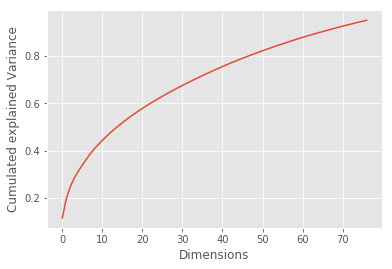

In [159]:
import numpy as np

cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('Dimensions')
plt.ylabel('Cumulated explained Variance')

Not a whole lot of feature reduction through PCA.

In [163]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
X_pca.head(2)

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-0.322226,0.261640,-0.101271,2.371336,-1.969393,0.606056,-0.519601,0.807828,-0.128615,0.343750,...,0.200260,0.963056,0.699243,0.151211,0.018452,0.159116,0.058467,-0.217591,-0.099505,0.039922
1,-1.617733,-0.431757,-1.121202,0.293595,-0.614387,0.339935,0.290450,0.032317,-0.690445,0.123639,...,0.113155,-0.150796,-0.435511,-0.100994,-0.021727,-0.141727,-0.286881,0.079725,0.034071,0.143423


#### Kernel PCA 

Undoable with the whole dataset, see https://stats.stackexchange.com/questions/348574/memoryerror-for-scikitlearn-kernel-pca.

<br> 
### K-Means Clustering 

#### Tryout with 5 clusters

In [167]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=5)
k_means.fit_predict(X_scaled)

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [168]:
#must be five
print(len(k_means.cluster_centers_))

#must be 93 if original feature space 
print(len(k_means.cluster_centers_[1]))

#first cluster center
k_means.cluster_centers_[1] 

5
93


array([-1.77190981e-01,  2.82706679e-01,  2.36217277e+00,  1.85465646e+00,
       -8.91355883e-03,  5.03970385e-03, -5.30257128e-02, -2.29078555e-01,
       -2.10831522e-01,  1.77760284e-02,  2.43408236e+00,  1.78816824e-01,
       -2.88864827e-02, -4.21074570e-01, -2.73569586e-01,  6.65687656e-01,
       -1.55958896e-01,  4.40752409e-01, -7.17863095e-02, -1.17644676e-01,
        1.23823519e+00,  6.91024342e-01, -2.21797723e-02, -1.06737447e-01,
       -6.00508865e-01,  9.48294090e-01,  1.96431349e+00,  1.82107205e+00,
       -6.51305413e-02, -3.00198251e-02,  6.97416655e-01, -1.75323939e-01,
       -3.46150494e-01, -1.59313442e-01,  9.26729497e-01, -1.59219452e-01,
       -1.08643739e-01,  7.41416773e-02, -9.61235512e-02, -3.65586982e-01,
       -1.45494763e-01,  4.00014679e-02, -6.51855517e-02,  7.01488499e-01,
       -5.69180328e-02,  2.17635070e+00, -8.01710070e-02, -4.29607787e-01,
        1.03354151e+00, -1.24042824e-01,  1.54792741e-01,  9.86236784e-01,
       -1.46819970e-01,  

In [169]:
#labels holds assigned clusters
k_means.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [170]:
#interia holds the within-cluster sum-of-squares
k_means.inertia_

4910830.821988597

#### Can we find an ideal cluster no.?

Let's assume for simplicity that we know we have at least 4 clusters in our data. We'll examine two methods for determining the optimal number of clusters.

*1) Elbow Criterion Method:*

The idea behind the elbow method is to run k-means clustering on a given dataset for a range of values of k (num_clusters, e.g k=4 to 12), and for each value of k, calculate sum of squared errors (SSE). 

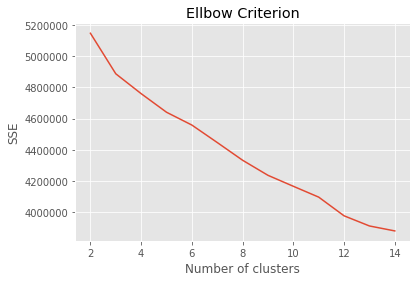

In [172]:
from sklearn.cluster import KMeans

sse = {}
predictions = {}

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(X_pca)
    predictions[k] = kmeans.labels_
    sse[k] = kmeans.inertia_ 

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('Ellbow Criterion')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In our case, the the ellbow criterion does not indicate much. 

*2) The Silhouette Coefficient*: 

Is defined for each sample and is composed of two scores:
- a: The mean distance between a sample and all other points in the same class.
- b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as: $$ s = \frac{b - a}{max(a, b)} $$

In [16]:
#from sklearn.metrics import silhouette_score

#for k in range(2, 15):
#    sil_coeff = silhouette_score(X, predictions[k], metric='euclidean')
#    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))

However, computing the *silhouette_score* turns out to be very memory intense - leading to a dying Kernel on my Acer Chromebook 14 (Crouton). See Issue: https://stackoverflow.com/questions/32573948/ipython-notebook-kernel-getting-dead-while-running-kmeans. 

*3) Calinski-Harabaz Index*: <br><br>
Another method is the Calinski-Harabaz Index, given as the ratio of the between-clusters dispersion mean and the within-cluster dispersion. <br> See details on [scikit-learn](http://scikit-learn.org/stable/modules/clustering.html#calinski-harabaz). 

In [173]:
from sklearn import metrics

for k in range(2, 15):
    print("For n_clusters={}, C-H-Score is {}".format(k,
          metrics.calinski_harabaz_score(X_scaled, predictions[k])))

For n_clusters=2, C-H-Score is 3841.091861044172
For n_clusters=3, C-H-Score is 3579.660368273077
For n_clusters=4, C-H-Score is 2970.299743908855
For n_clusters=5, C-H-Score is 2657.869416305046
For n_clusters=6, C-H-Score is 2374.7990015883333
For n_clusters=7, C-H-Score is 2270.8463361329095
For n_clusters=8, C-H-Score is 2214.1919367271075
For n_clusters=9, C-H-Score is 2145.37603499986
For n_clusters=10, C-H-Score is 2046.4740669102957
For n_clusters=11, C-H-Score is 1970.015428688239
For n_clusters=12, C-H-Score is 2001.3478269335333
For n_clusters=13, C-H-Score is 1943.753925065983
For n_clusters=14, C-H-Score is 1845.0165792489631


According to C-H Index, we'd opt for two clusters. 

**Presuming, we know that we have 9 clusters - how well would K-Means actually do?**

In [174]:
y.unique()

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

If C is a ground truth class assignment and K the clustering, let us define  and  as:

- the number of pairs of elements that are in the same set in C and in the same set in K
-  the number of pairs of elements that are in different sets in C and in different sets in K

The raw (unadjusted) Rand index is then given by: <br><br>
$
\begin{align}
\text{RI} = \frac{a + b}{C_2^{n_{samples}}}
\end{align}
$

Where $
\begin{align}
{C_2^{n_{samples}}}
\end{align} $
is the total number of possible pairs in the dataset (without ordering).

In [204]:
kmeans = KMeans(n_clusters=9).fit(X_pca)
y_pred = kmeans.labels_

metrics.adjusted_rand_score(y, y_pred)

0.20049833151329963

In [205]:
#Throw results in a df
y_df_kmeans = pd.DataFrame()
y_df_kmeans['y'] = y
y_df_kmeans['y_pred'] = y_pred

#Explore predictions
y_df_kmeans['y_pred'].value_counts()

7    19171
5    15750
2     5897
4     5182
6     3806
0     3700
1     3475
3     2564
8     2333
Name: y_pred, dtype: int64

In [206]:
y.value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

**Let's modify our data a little, simulating we have only 9 ... 2 clusters in our data (with the most frequent classes kept).**

In [178]:
from sklearn.cluster import KMeans
from sklearn import metrics

classes = list(y.value_counts().index) 

def do_clustering(k, X): 

    #Concat X with y to filter classes
    X['target'] = y
    X = X[X.target.isin(classes[:k])]
    y_new = X.iloc[:,-1:]
    X = X.iloc[:,:-1]
    
    #Clustering 
    clustering = KMeans(n_clusters=k).fit(X)
        
    y_pred = clustering.labels_
    
    #Return adj rand score
    return metrics.adjusted_rand_score(y_new.target, y_pred)

In [190]:
for k in range(9,1,-1): 
    print('\n {} clusters:'.format(k))
    print(do_clustering(k,pd.DataFrame(X_scaled)))


 9 clusters:
0.1984468864253334

 8 clusters:
0.2003092352600716

 7 clusters:
0.25869615623602105

 6 clusters:
0.34025724079610375

 5 clusters:
0.303997069444223

 4 clusters:
0.3377847993312014

 3 clusters:
0.20547743205848792

 2 clusters:
0.23257747621575853


Could be weigh better...

**Any notable difference in the PCA transformed dataset?**

In [207]:
for k in range(9,1,-1): 
    print('\n {} clusters:'.format(k))
    print(do_clustering(k, pd.DataFrame(X_pca)))


 9 clusters:
0.19982008290834755

 8 clusters:
0.20125952363388122

 7 clusters:
0.2578518212420332

 6 clusters:
0.3402509216400258

 5 clusters:
0.3043592936602965

 4 clusters:
0.33744056641788217

 3 clusters:
0.2053031686971332

 2 clusters:
0.2323852556522679


### Annex: Scenario - Without log-scaling 

In [212]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Read df
df_new = pd.read_csv('data/train.csv')

#Keep y (targets) for evaluation of clustering 
y_new = df_new.iloc[:,-1:].target
X_new = df_new.iloc[:,:-1].drop(['id'], axis=1)

#Scale X
X_scaled_new = pd.DataFrame(StandardScaler().fit_transform(X_new))

#PCA
pca_new = PCA(n_components=0.95)
X_pca_new = pd.DataFrame(pca.fit_transform(X_scaled_new))

#KMeans without PCA
print('Adj Rand without PCA:', do_clustering(9,X_scaled_new))

#KMeans with PCA
print('Adj Rand with PCA:', do_clustering(9,X_pca_new))

Adj Rand without PCA: 0.0860399870181946
Adj Rand with PCA: 0.062694999123541


Log-Transform improved performance by ~10-12% in the 9 cluster case!

### Hierarchical Clustering 

Dying Kernel. From [Wiki](https://en.wikipedia.org/wiki/Hierarchical_clustering): The standard algorithm for hierarchical agglomerative clustering (HAC) has a time complexity of $ {\mathcal {O}}(n^{3})$ and requires $ {\mathcal {O}}(n^{2}) $ memory, which makes it too slow for even medium data sets. 